<a href="https://colab.research.google.com/github/chrisaMel/Machine-Learning/blob/Python-exercises-Udemy-course/Titanic_Classification_Log_Reggresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df_train = pd.read_csv('titanic_train.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

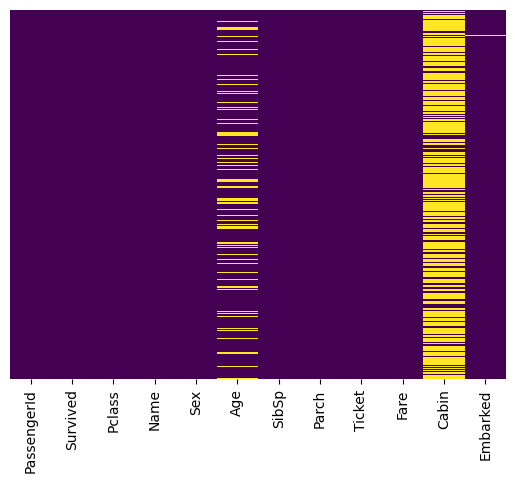

In [8]:
sns.heatmap(df_train.isnull(),cmap='viridis',yticklabels=False, cbar=False)

In [9]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

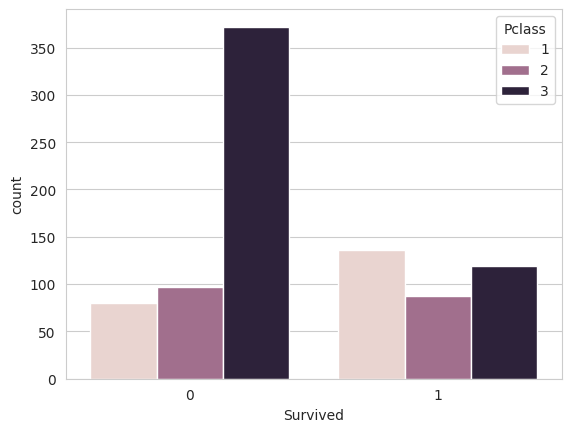

In [12]:
sns.countplot(data=df_train, x='Survived',hue='Pclass')

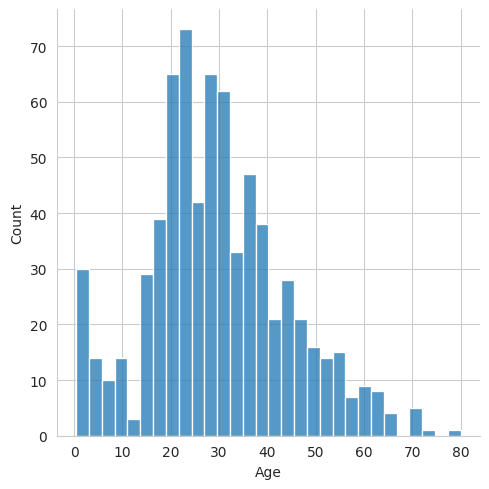

In [17]:
sns.displot( df_train['Age'].dropna(), bins = 30 )

<Axes: xlabel='SibSp', ylabel='count'>

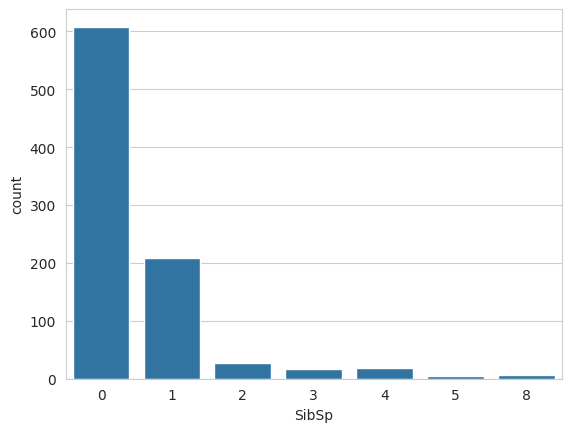

In [18]:
sns.countplot(x='SibSp', data = df_train)

<Axes: ylabel='Frequency'>

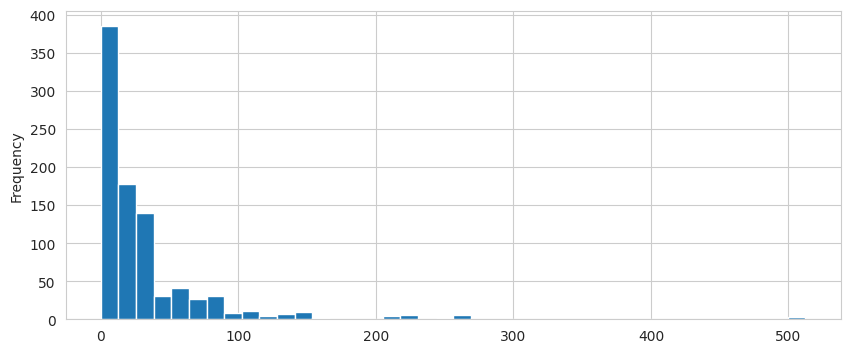

In [22]:
df_train['Fare'].plot.hist(bins = 40, figsize = (10,4))

<Axes: xlabel='Pclass', ylabel='Age'>

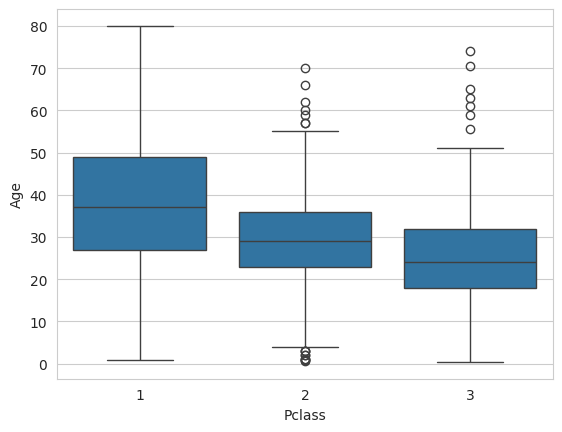

In [23]:
sns.boxplot(data = df_train, x= 'Pclass', y = 'Age')

In [24]:
def imput_age(cols):
  Age = cols[0]
  Pclass= cols[1]
  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age


In [25]:
df_train['Age'] = df_train[['Age','Pclass']].apply(imput_age, axis=1)

<ipython-input-24-b93d757d3612>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-24-b93d757d3612>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass= cols[1]


<Axes: >

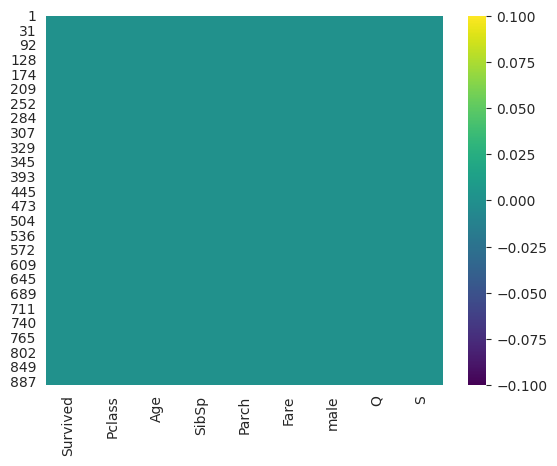

In [45]:
sns.heatmap( df_train.isnull(),cmap = 'viridis')

In [44]:
df_train.drop('Cabin', axis=1,inplace= True)

In [34]:
df_train.dropna(inplace= True)

In [36]:
sex = pd.get_dummies(df_train['Sex'],drop_first=True)

In [37]:
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)

In [38]:
df_train = pd.concat([df_train,sex,embark], axis = 1)

In [39]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,True,False,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,False,False,True
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,False,False,True
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,True,False,True
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,False,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False,False,True


In [42]:
df_train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis = 1, inplace=True)

In [46]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,1,1,38.0,1,0,71.2833,False,False,False
3,1,1,35.0,1,0,53.1000,False,False,True
6,0,1,54.0,0,0,51.8625,True,False,True
10,1,3,4.0,1,1,16.7000,False,False,True
11,1,1,58.0,0,0,26.5500,False,False,True


In [47]:
X = df_train.drop('Survived',axis =1)
y = df_train['Survived']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

In [53]:
from sklearn.linear_model import LogisticRegression

In [56]:
logmodel = LogisticRegression(max_iter=10000 )

In [57]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [59]:
predictions = logmodel.predict(X_test)

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.86      0.90      0.88        41

    accuracy                           0.84        61
   macro avg       0.82      0.80      0.81        61
weighted avg       0.83      0.84      0.83        61



In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
print(confusion_matrix(y_test,predictions))

[[14  6]
 [ 4 37]]
